In [0]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          6.3                         
year           2020                        
month          02                          
day            29                          
svn rev        77875                       
language       R                           
version.string R version 3.6.3 (2020-02-29)
nickname       Holding the Windsock        

In [0]:
install.packages("arules")
install.packages("arulesViz")
library(tidyverse)
library(arules)  # has a big ecosystem of packages built around it
library(arulesViz)
library(dplyr)

# Association rule mining
# Adapted from code by Matt Taddy

In [0]:
# Read in orders
# This is in "long" format -- every row is a single order-product pair
orders_raw = read.csv("order_products__train.csv")
orders_raw = orders_raw[1:80000,]
orders_raw$product_id = as.factor(orders_raw$product_id)
prod = read.csv("products.csv")
prod$product_id = as.factor(prod$product_id)

ord_prod = merge(orders_raw, prod, by = "product_id")

In [0]:
order_baskets <- ord_prod %>% 
  group_by(order_id) %>%
  summarise(basket = as.vector(list(product_name)))

## Cast this variable as a special arules "transactions" class.
transactions <- as(order_baskets$basket, "transactions")

In [57]:
summary(transactions)

transactions as itemMatrix in sparse format with
 7638 rows (elements/itemsets/transactions) and
 15065 columns (items) and a density of 0.0006952503 

most frequent items:
                Banana Bag of Organic Bananas   Organic Strawberries 
                  1093                    893                    634 
  Organic Baby Spinach            Large Lemon                (Other) 
                   568                    462                  76350 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
406 439 470 504 539 497 442 478 446 391 332 322 283 250 211 199 193 129 142 111 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
112  83 113  76  76  61  45  34  31  31  28  19  21  17  16  15  10  11   9   8 
 41  42  43  44  45  46  47  48  49  50  53  54  57  60  64  70 
  4   3   4   3   6   3   2   1   1   1   1   5   1   1   1   1 

   Min. 1st Qu.  Median    Mean 3r

In [56]:
basketrules = apriori(transactions, 
                     parameter=list(support=.005, confidence=.1, maxlen=5))

# Look at the output... so many rules!
inspect(basketrules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5   0.005      1
 maxlen target  ext
      5  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 38 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[15065 item(s), 7638 transaction(s)] done [0.05s].
sorting and recoding items ... [261 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [142 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
      lhs                                       rhs                          support confidence   coverage     lift count
[1]   {}                                     => {Bag of Organic Bananas} 0.116915423  0.1169154 1.00000000 1.000000   893
[2]   {}                                 

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



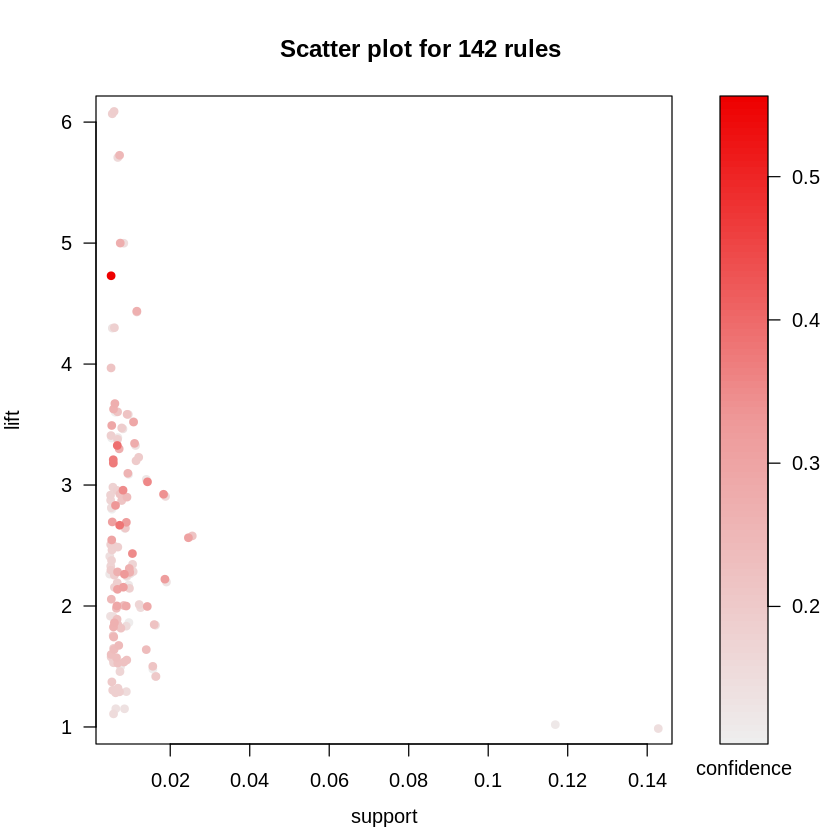

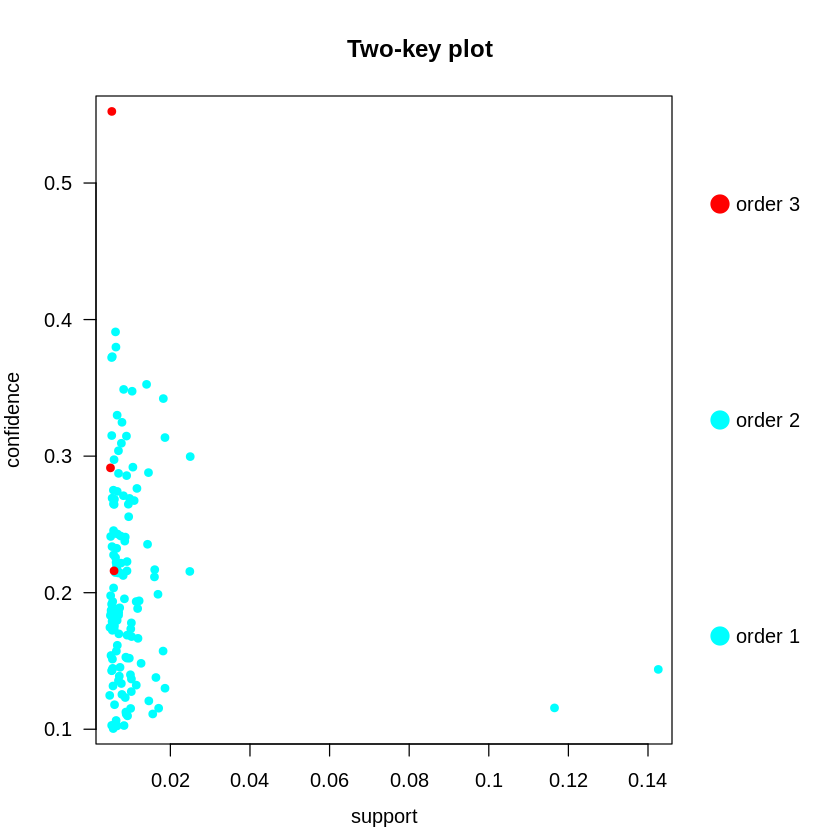

In [55]:
plot(basketrules, measure = c("support", "lift"), shading = "confidence")

# "two key" plot: coloring is by size (order) of item set
plot(basketrules, method='two-key plot')

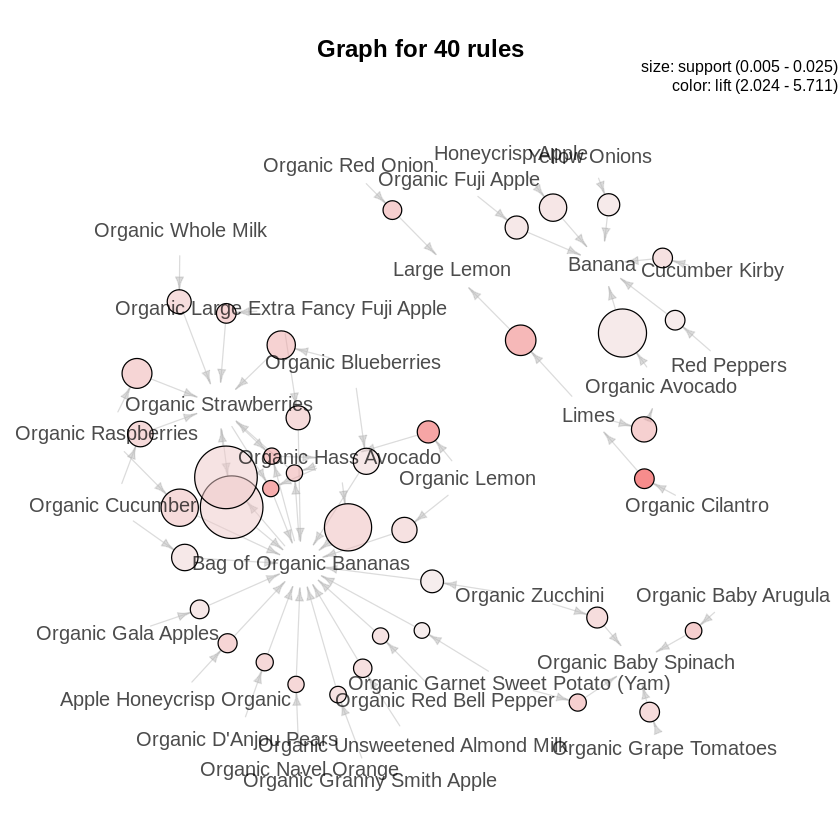

In [59]:
sub1 = subset(basketrules, subset=confidence > 0.2 & support > 0.005 & lift >1)
#summary(sub1)
#plot(sub1, method='graph')
?plot.rules

plot(head(sub1, 40, by='lift'), method='graph')

In [53]:
#inspect(sort(sub1, by="lift")[1:62])

xx = sort(sub1, by="lift")[1:62]
as.matrix(xx)

ERROR: ignored

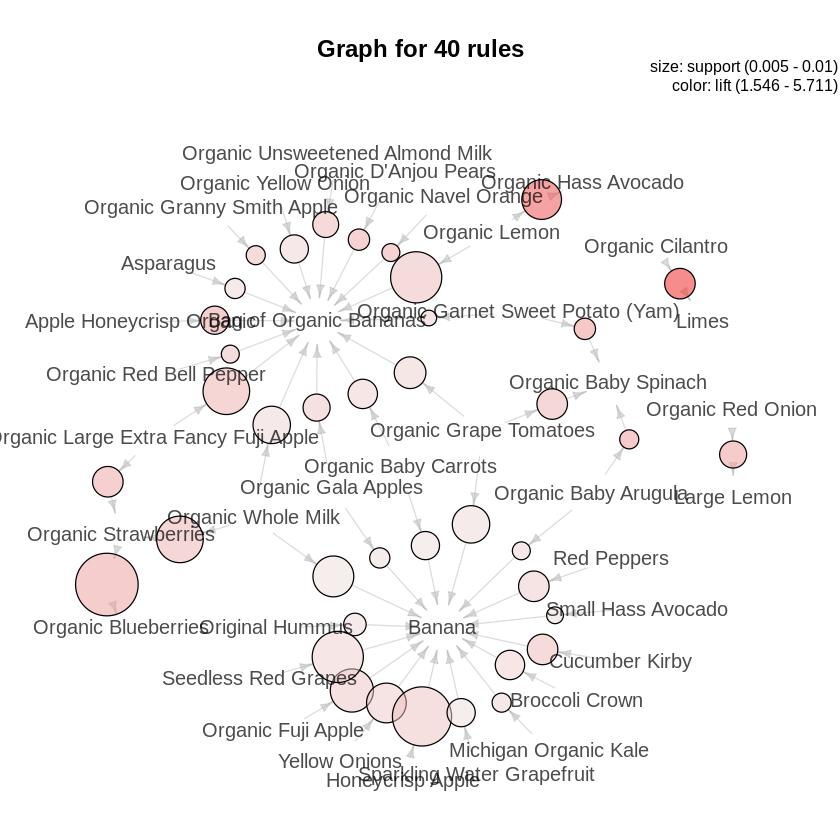

In [0]:
plot(head(sub1,40), method='graph')